In [955]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Cleaning

In [956]:
raw_data = pd.read_csv("data.csv")

In [957]:
raw_data

,Announce Date,Company,Industry,Coattail,Sunset,Market Cap (C$ MM),Subordinate Voting (MM),Superior Voting (MM),Total Voting (MM),Votes per Superior,...,Subject to Shareholder Vote,Stock Change 1-day %,Stock Change 10-day %,Public Float Pre (MM),Public Float Post (MM),% Float Change,Volume Pre (000s),Vol 3mo %,Vol 6mo %,Vol 1yr %
0,31-May-06,Extendicare,REIT,No,No,1884.0,57.1,11.80,68.9,10.0,...,Yes,-6.3,-10.4,57.0,61.0,6.6,307.0,11.0,51.0,32.0
1,14-May-06,Canam Group,Building Products,Yes,No,430.0,47.1,7.00,54.1,5.0,...,Yes,5.9,15.5,57.0,57.0,0.0,81.0,94.0,34.0,21.0
2,13-Dec-05,CoolBrands,Branded Food,Yes,No,50.0,50.0,6.00,56.0,10.0,...,Yes,1.9,14.9,36.0,36.0,0.0,388.0,-74.0,-55.0,-26.0
3,14-Sep-05,ProMetic Life Sciences,Healthcare,Yes,No,51.0,116.5,13.00,129.5,10.0,...,Yes,4.3,-12.8,116.0,116.0,0.0,146.0,69.0,28.0,4.0
4,31-Mar-05,DizA Resources,Metals,Yes,No,41.0,53.8,6.00,61.1,10.0,...,Yes,1.4,-1.4,36.0,37.0,2.0,128.0,-24.0,-20.0,14.0
5,26-Feb-04,MDC Partners,Media,Yes,No,365.0,18.6,0.10,20.5,20.0,...,Yes,1.7,12.5,19.0,19.0,0.0,109.0,-37.0,-2.0,-23.0
6,7-Feb-04,Gildan,Retail,Yes,No,590.0,23.4,6.10,29.5,8.0,...,No,0.9,9.8,23.0,24.0,4.5,381.0,-24.0,15.0,28.0
7,17-Oct-03,Sino-Forest,Metals,Yes,No,277.0,84.2,6.00,90.7,5.0,...,No,7.5,5.5,130.0,888.0,552.0,142.0,633.0,552.0,391.0
8,7-May-03,Sceptre,Financial,No,No,64.0,13.6,0.05,13.6,NaN,...,Yes,7.4,29.8,13.0,13.0,0.0,15.0,9.0,3.0,21.0
9,2-Aug-00,Goldcorp,Metals & Mining,No,No,728.0,74.5,5.50,78.1,10.0,...,Yes,8.4,18.0,74.0,76.0,3.0,1669.0,-3.0,-12.0,33.0


In [958]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Announce Date                14 non-null     object 
 1   Company                      15 non-null     object 
 2   Industry                     15 non-null     object 
 3   Coattail                     15 non-null     object 
 4   Sunset                       15 non-null     object 
 5   Market Cap (C$ MM)           15 non-null     float64
 6   Subordinate Voting (MM)      15 non-null     float64
 7   Superior Voting (MM)         15 non-null     float64
 8   Total Voting (MM)            15 non-null     float64
 9   Votes per Superior           10 non-null     float64
 10  Sup-Econ %                   15 non-null     float64
 11  Sup-Vote %                   15 non-null     float64
 12  Sup Vote-Con Econ            15 non-null     float64
 13  Sup Vote/Econ         

In [959]:
data = raw_data[["Company","Coattail","Sunset","Market Cap (C$ MM)","Subordinate Voting (MM)", "Superior Voting (MM)","Sup Vote/Econ","Stock Change 10-day %"]]

In [960]:
data

,Company,Coattail,Sunset,Market Cap (C$ MM),Subordinate Voting (MM),Superior Voting (MM),Sup Vote/Econ,Stock Change 10-day %
0,Extendicare,No,No,1884.0,57.1,11.80,3.9,-10.4
1,Canam Group,Yes,No,430.0,47.1,7.00,47.3,15.5
2,CoolBrands,Yes,No,50.0,50.0,6.00,5.1,14.9
3,ProMetic Life Sciences,Yes,No,51.0,116.5,13.00,5.2,-12.8
4,DizA Resources,Yes,No,41.0,53.8,6.00,7.4,-1.4
5,MDC Partners,Yes,No,365.0,18.6,0.10,13.6,12.5
6,Gildan,Yes,No,590.0,23.4,6.10,3.3,9.8
7,Sino-Forest,Yes,No,277.0,84.2,6.00,3.9,5.5
8,Sceptre,No,No,64.0,13.6,0.05,1507.3,29.8
9,Goldcorp,No,No,728.0,74.5,5.50,6.2,18.0


In [961]:
#data["Total Voting (MM)"] = data["Superior Voting (MM)"] + data["Subordinate Voting (MM)"]

In [962]:
#data.iloc[:,-1] = data.iloc[:,-1] /100

In [963]:
data.describe(include="all")

,Company,Coattail,Sunset,Market Cap (C$ MM),Subordinate Voting (MM),Superior Voting (MM),Sup Vote/Econ,Stock Change 10-day %
count,15,15,15,15.000000,15.000000,15.000000,15.000000,13.000000
unique,15,2,1,NaN,NaN,NaN,NaN,NaN
top,Extendicare,Yes,No,NaN,NaN,NaN,NaN,NaN
freq,1,10,15,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1329.466667,66.573333,8.523333,115.226667,8.223077
std,NaN,NaN,NaN,2274.995161,66.415354,11.579521,386.007436,12.091054
min,NaN,NaN,NaN,41.000000,9.100000,0.050000,3.300000,-12.800000
25%,NaN,NaN,NaN,88.000000,21.000000,2.850000,4.800000,1.100000
50%,NaN,NaN,NaN,365.000000,50.000000,6.000000,6.200000,9.800000
75%,NaN,NaN,NaN,1205.000000,79.350000,9.400000,10.500000,15.500000


In [964]:
data["Coattail"] = data["Coattail"].map({"Yes": 1, "No": 0})
data["Sunset"]   = data["Sunset"].map({"Yes": 1, "No": 0})

C:\Users\rohan\AppData\Local\Temp\ipykernel_19956\1500345549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Coattail"] = data["Coattail"].map({"Yes": 1, "No": 0})
C:\Users\rohan\AppData\Local\Temp\ipykernel_19956\1500345549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Sunset"]   = data["Sunset"].map({"Yes": 1, "No": 0})


In [965]:
MAGNA = data[data["Company"] == "Magna"].copy()

In [966]:
data = data.dropna().reset_index(drop=True)
#data = data.drop(12)

In [967]:
data.describe(include="all")

,Company,Coattail,Sunset,Market Cap (C$ MM),Subordinate Voting (MM),Superior Voting (MM),Sup Vote/Econ,Stock Change 10-day %
count,13,13.000000,13.0,13.000000,13.000000,13.000000,13.000000,13.000000
unique,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Extendicare,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.692308,0.0,949.230769,66.838462,9.526923,124.584615,8.223077
std,NaN,0.480384,0.0,1652.215389,69.113271,12.164200,415.619836,12.091054
min,NaN,0.000000,0.0,41.000000,9.100000,0.050000,3.300000,-12.800000
25%,NaN,0.000000,0.0,64.000000,23.400000,5.500000,4.800000,1.100000
50%,NaN,1.000000,0.0,365.000000,50.000000,6.000000,5.200000,9.800000
75%,NaN,1.000000,0.0,728.000000,74.500000,11.800000,7.400000,15.500000


In [968]:
data.isnull().sum()     # count of missing values per column

Company                    0
Coattail                   0
Sunset                     0
Market Cap (C$ MM)         0
Subordinate Voting (MM)    0
Superior Voting (MM)       0
Sup Vote/Econ              0
Stock Change 10-day %      0
dtype: int64

In [969]:
data

,Company,Coattail,Sunset,Market Cap (C$ MM),Subordinate Voting (MM),Superior Voting (MM),Sup Vote/Econ,Stock Change 10-day %
0,Extendicare,0,0,1884.0,57.1,11.80,3.9,-10.4
1,Canam Group,1,0,430.0,47.1,7.00,47.3,15.5
2,CoolBrands,1,0,50.0,50.0,6.00,5.1,14.9
3,ProMetic Life Sciences,1,0,51.0,116.5,13.00,5.2,-12.8
4,DizA Resources,1,0,41.0,53.8,6.00,7.4,-1.4
5,MDC Partners,1,0,365.0,18.6,0.10,13.6,12.5
6,Gildan,1,0,590.0,23.4,6.10,3.3,9.8
7,Sino-Forest,1,0,277.0,84.2,6.00,3.9,5.5
8,Sceptre,0,0,64.0,13.6,0.05,1507.3,29.8
9,Goldcorp,0,0,728.0,74.5,5.50,6.2,18.0


# Training

In [970]:
X = data.iloc[:,1:-1]
Y = data.iloc[:,-1]

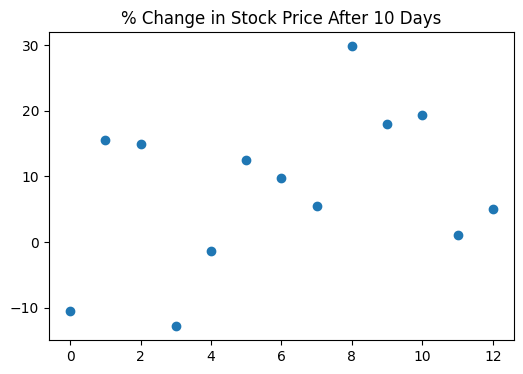

In [971]:
Y.plot(style="o", figsize=(6,4), title="% Change in Stock Price After 10 Days")
plt.show()

# Visually it's clear that regression is not a suitable learner for this data

In [972]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut, cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [973]:
#scaler = MinMaxScaler()
scaler = RobustScaler()
#scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [974]:
model = LinearRegression()
model.fit(X_scaled,Y)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

y_pred = model.predict(X_scaled)
print("MSE:", mean_squared_error(Y, y_pred))
print("MAE :", mean_absolute_error(Y, y_pred))

results = pd.DataFrame({
    "Company": data["Company"].values,
    "y_true": Y.values ,   # actual
    "y_pred": y_pred    # predicted
})
results["error"] = results["y_true"] - results["y_pred"]
results["abs_error"] = results["error"].abs()
results



Intercept: 8.318370165225852
Coefficients: [ 1.31137390e+01  2.60055866e-13  9.50673726e+00  5.59283278e+00
 -1.52671723e+01  4.96352510e-02]
MSE: 62.07406693328848
MAE : 6.582026551983436


,Company,y_true,y_pred,error,abs_error
0,Extendicare,-10.4,3.649501,-14.049501,14.049501
1,Canam Group,15.5,7.311947,8.188053,8.188053
2,CoolBrands,14.9,3.806488,11.093512,11.093512
3,ProMetic Life Sciences,-12.8,-5.862466,-6.937534,6.937534
4,DizA Resources,-1.4,4.137445,-5.537445,5.537445
5,MDC Partners,12.5,19.339866,-6.839866,6.839866
6,Gildan,9.8,8.349834,1.450166,1.450166
7,Sino-Forest,5.5,10.776772,-5.276772,5.276772
8,Sceptre,29.8,30.005973,-0.205973,0.205973
9,Goldcorp,18.0,4.314104,13.685896,13.685896


In [975]:
N_NEIGHBORS = 4

In [976]:
knn_model = KNeighborsRegressor(n_neighbors=N_NEIGHBORS)  
knn_model.fit(X_scaled, Y)
y_pred_knn = knn_model.predict(X_scaled)

print("MSE:", mean_squared_error(Y, y_pred_knn))
print("MAE:", mean_absolute_error(Y, y_pred_knn))

results_knn = pd.DataFrame({
    "Company": data["Company"].values,
    "y_true": Y.values,
    "y_pred": y_pred_knn
})
results_knn["error"] = results_knn["y_true"] - results_knn["y_pred"]
results_knn["abs_error"] = results_knn["error"].abs()
results_knn

MSE: 91.97283653846155
MAE: 7.6326923076923086


,Company,y_true,y_pred,error,abs_error
0,Extendicare,-10.4,9.200,-19.600,19.600
1,Canam Group,15.5,11.150,4.350,4.350
2,CoolBrands,14.9,6.000,8.900,8.900
3,ProMetic Life Sciences,-12.8,1.550,-14.350,14.350
4,DizA Resources,-1.4,6.000,-7.400,7.400
5,MDC Partners,12.5,8.525,3.975,3.975
6,Gildan,9.8,8.800,1.000,1.000
7,Sino-Forest,5.5,4.350,1.150,1.150
8,Sceptre,29.8,14.100,15.700,15.700
9,Goldcorp,18.0,9.250,8.750,8.750


In [977]:
N_ESTIMATORS = 10

In [978]:
rf_model = RandomForestRegressor(n_estimators=N_ESTIMATORS, random_state=42)
rf_model.fit(X, Y)
y_pred_rf = rf_model.predict(X)

print("MSE:", mean_squared_error(Y, y_pred_rf))
print("MAE:", mean_absolute_error(Y, y_pred_rf))

results_rf = pd.DataFrame({
    "Company": data["Company"].values,
    "y_true": Y.values,
    "y_pred": y_pred_rf
})
results_rf["error"] = results_rf["y_true"] - results_rf["y_pred"]
results_rf["abs_error"] = results_rf["error"].abs()
results_rf


MSE: 17.423630769230765
MAE: 3.5646153846153843


,Company,y_true,y_pred,error,abs_error
0,Extendicare,-10.4,-4.92,-5.48,5.48
1,Canam Group,15.5,15.90,-0.40,0.40
2,CoolBrands,14.9,12.68,2.22,2.22
3,ProMetic Life Sciences,-12.8,-8.20,-4.60,4.60
4,DizA Resources,-1.4,4.98,-6.38,6.38
5,MDC Partners,12.5,13.93,-1.43,1.43
6,Gildan,9.8,10.46,-0.66,0.66
7,Sino-Forest,5.5,4.22,1.28,1.28
8,Sceptre,29.8,23.11,6.69,6.69
9,Goldcorp,18.0,13.87,4.13,4.13


In [979]:
importances = rf_model.feature_importances_
features = X.columns

feat_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values("Importance", ascending=False)

print(feat_importance_df)

                   Feature  Importance
3  Subordinate Voting (MM)    0.367031
4     Superior Voting (MM)    0.249501
2       Market Cap (C$ MM)    0.208405
5            Sup Vote/Econ    0.163026
0                 Coattail    0.012037
1                   Sunset    0.000000


In [980]:
MAX_DEPTH = 3

In [981]:
dt_model = DecisionTreeRegressor(random_state=42, max_depth=MAX_DEPTH)
dt_model.fit(X, Y)
y_pred_dt = dt_model.predict(X)

print("MSE:", mean_squared_error(Y, y_pred_dt))
print("MAE:", mean_absolute_error(Y, y_pred_dt))

results_dt = pd.DataFrame({
    "Company": data["Company"].values,
    "y_true": Y.values,
    "y_pred": y_pred_dt
})
results_dt["error"] = results_dt["y_true"] - results_dt["y_pred"]
results_dt["abs_error"] = results_dt["error"].abs()
results_dt

MSE: 13.462435897435897
MAE: 2.894871794871795


,Company,y_true,y_pred,error,abs_error
0,Extendicare,-10.4,-7.366667,-3.033333,3.033333
1,Canam Group,15.5,16.600000,-1.100000,1.100000
2,CoolBrands,14.9,16.600000,-1.700000,1.700000
3,ProMetic Life Sciences,-12.8,-7.366667,-5.433333,5.433333
4,DizA Resources,-1.4,2.050000,-3.450000,3.450000
5,MDC Partners,12.5,9.100000,3.400000,3.400000
6,Gildan,9.8,9.100000,0.700000,0.700000
7,Sino-Forest,5.5,2.050000,3.450000,3.450000
8,Sceptre,29.8,29.800000,0.000000,0.000000
9,Goldcorp,18.0,18.000000,0.000000,0.000000


In [982]:

"""
plt.figure(figsize=(20,10)) 
tree.plot_tree(
    dt_model,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=9  
)
"""
#plt.savefig("dt.png", dpi=300, bbox_inches="tight") 
#plt.show()
#plt.close() 

'\nplt.figure(figsize=(20,10)) \ntree.plot_tree(\n    dt_model,\n    feature_names=X.columns,\n    filled=True,\n    rounded=True,\n    fontsize=9  \n)\n'

In [983]:
loo = LeaveOneOut()

models = {
    "LinearRegression": Pipeline([
        ("model", LinearRegression())
    ]),
    "KNN": Pipeline([
        ("model", KNeighborsRegressor(n_neighbors=N_NEIGHBORS))
    ]),
    "RandomForest": RandomForestRegressor(n_estimators=N_ESTIMATORS, random_state=42),
    "DecisionTree": DecisionTreeRegressor(random_state=42,max_depth=MAX_DEPTH)
}


mae_scores = {}
preds_by_model = {}

for name, mdl in models.items():
    if mdl == "KNN" or mdl == "LinearRegression":
        y_pred = cross_val_predict(mdl, X_scaled, Y, cv=loo)
    else:
        y_pred = cross_val_predict(mdl, X, Y, cv=loo)
    preds_by_model[name] = y_pred
    mae = mean_absolute_error(Y, y_pred)
    mae_scores[name] = mae


print("LOOCV MAE by model:")
for name, mae in mae_scores.items():
    print(f"  {name:>14}: {mae:.4f}")

# (Optional) inspect per-point predictions for a model
# results = pd.DataFrame({"y_true": Y.values, "y_pred": preds_by_model["RandomForest"]})
# results["abs_err"] = (results["y_true"] - results["y_pred"]).abs()
# print(results)


LOOCV MAE by model:
  LinearRegression: 35.9120
             KNN: 9.8135
    RandomForest: 10.9708
    DecisionTree: 14.1396


# Inference

In [984]:
MAGNA

,Company,Coattail,Sunset,Market Cap (C$ MM),Subordinate Voting (MM),Superior Voting (MM),Sup Vote/Econ,Stock Change 10-day %
14,Magna,0,0,7379.0,111.9,0.7,102.4,NaN


In [985]:
#MAGNA_X = MAGNA.iloc[:,1:-1]
MAGNA_X = MAGNA.loc[MAGNA["Company"]=="Magna", X.columns]
MAGNA_SCALED = pd.DataFrame(scaler.transform(MAGNA_X),columns=X.columns)

In [986]:
MAGNA_SCALED

,Coattail,Sunset,Market Cap (C$ MM),Subordinate Voting (MM),Superior Voting (MM),Sup Vote/Econ
0,-1.0,0.0,10.563253,1.21135,-0.84127,37.384615


In [987]:
rf_pred = rf_model.predict(MAGNA_X)
knn_pred = knn_model.predict(MAGNA_SCALED)
reg_pred = model.predict(MAGNA_SCALED)
print(f"RF: {rf_pred}")
print(f"KNN: {knn_pred}")
print(f"Regression: {reg_pred}")

RF: [5.53]
KNN: [6.925]
Regression: [117.1009882]


In [988]:
distances, indices = knn_model.kneighbors(MAGNA_SCALED, n_neighbors=len(X_scaled))

print("Neighbor ordering by distance:")
for rank, (idx, dist) in enumerate(zip(indices[0], distances[0]), start=1):
    print(f"{rank}. {data.iloc[idx]['Company']}, Distance={dist:.3f}, 10 Day Stock Change %={Y.iloc[idx]}")

Neighbor ordering by distance:
1. Canam Group, Distance=23.712, 10 Day Stock Change %=15.5
2. MDC Partners, Distance=35.811, 10 Day Stock Change %=12.5
3. Laidlaw, Distance=37.701, 10 Day Stock Change %=1.1
4. DizA Resources, Distance=38.212, 10 Day Stock Change %=-1.4
5. Goldcorp, Distance=38.346, 10 Day Stock Change %=18.0
6. MDS Inc., Distance=38.584, 10 Day Stock Change %=19.4
7. Extendicare, Distance=38.833, 10 Day Stock Change %=-10.4
8. ProMetic Life Sciences, Distance=39.041, 10 Day Stock Change %=-12.8
9. CoolBrands, Distance=39.058, 10 Day Stock Change %=14.9
10. Slater Steel, Distance=39.167, 10 Day Stock Change %=5.0
11. Sino-Forest, Distance=39.391, 10 Day Stock Change %=5.5
12. Gildan, Distance=39.523, 10 Day Stock Change %=9.8
13. Sceptre, Distance=540.462, 10 Day Stock Change %=29.8


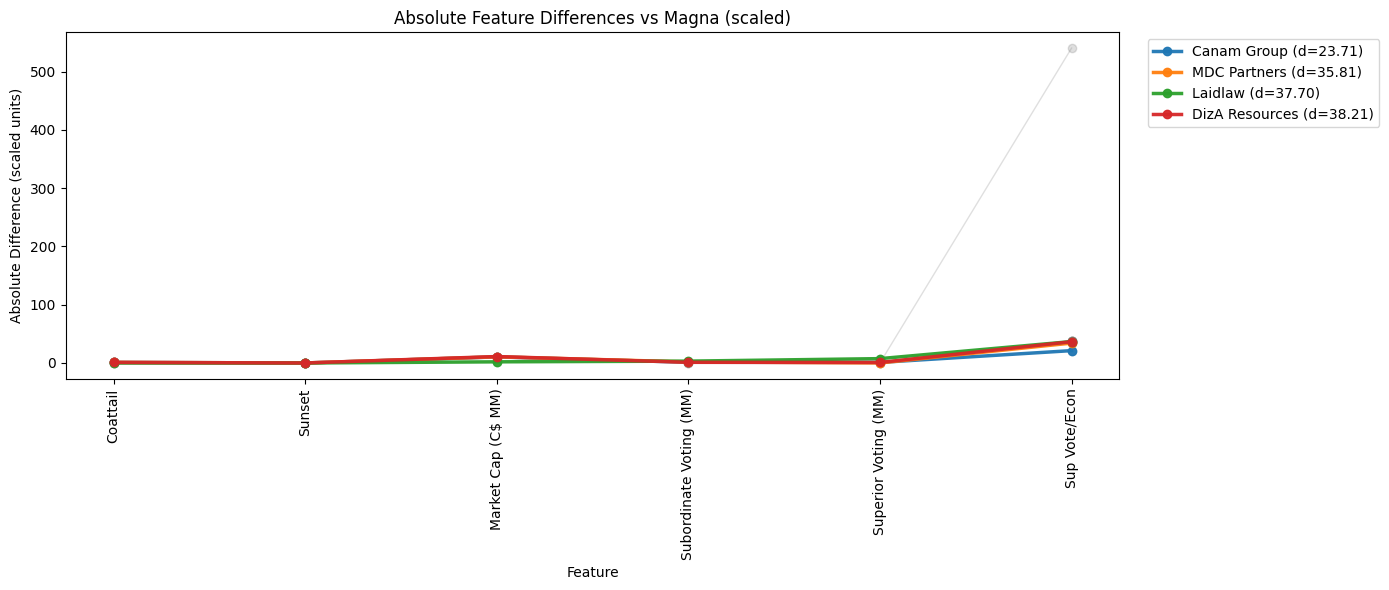

Nearest to Magna by L2 distance (scaled features):
 1. Canam Group           dist=23.712
 2. MDC Partners          dist=35.811
 3. Laidlaw               dist=37.701
 4. DizA Resources        dist=38.212
 5. Goldcorp              dist=38.346
 6. MDS Inc.              dist=38.584
 7. Extendicare           dist=38.833
 8. ProMetic Life Sciences  dist=39.041
 9. CoolBrands            dist=39.058
10. Slater Steel          dist=39.167
11. Sino-Forest           dist=39.391
12. Gildan                dist=39.523
13. Sceptre               dist=540.462


In [989]:
# --- Absolute differences vs Magna (in scaled feature space) ---
# Make sure MAGNA_SCALED is a single-row DataFrame aligned to X.columns (you already have this)
magna_vec = MAGNA_SCALED.iloc[0]  # Series with same index as X.columns

# Row-wise subtract + abs (broadcast Magna's row across all companies)
abs_diffs = X_scaled.sub(magna_vec, axis=1).abs()   # shape: (n_companies, n_features)

# Compute overall distances (L2) to Magna to rank neighbors
l2_dist = (abs_diffs.pow(2).sum(axis=1)).pow(0.5)   # Series indexed like data
neighbor_rank = l2_dist.sort_values()

# Pick how many nearest neighbors to highlight
TOP_K = 4
topk_idx = neighbor_rank.index[:TOP_K]

# --- Plot: spaghetti lines by feature, highlight nearest neighbors ---
fig, ax = plt.subplots(figsize=(14, 6))

# Plot all companies faintly
for idx in abs_diffs.index:
    ax.plot(abs_diffs.columns, abs_diffs.loc[idx].values,
            marker="o", linewidth=1, alpha=0.25, color="gray")

# Highlight the TOP_K nearest neighbors with labels
for idx in topk_idx:
    ax.plot(abs_diffs.columns, abs_diffs.loc[idx].values,
            marker="o", linewidth=2.5, alpha=0.95,
            label=f"{data.loc[idx, 'Company']} (d={neighbor_rank.loc[idx]:.2f})")

ax.set_title("Absolute Feature Differences vs Magna (scaled)")
ax.set_xlabel("Feature")
ax.set_ylabel("Absolute Difference (scaled units)")  
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


# print the neighbor ordering with distances 
print("Nearest to Magna by L2 distance (scaled features):")
for i, (idx, d) in enumerate(neighbor_rank.items(), start=1):
    print(f"{i:2d}. {data.loc[idx, 'Company']:<20}  dist={d:.3f}")


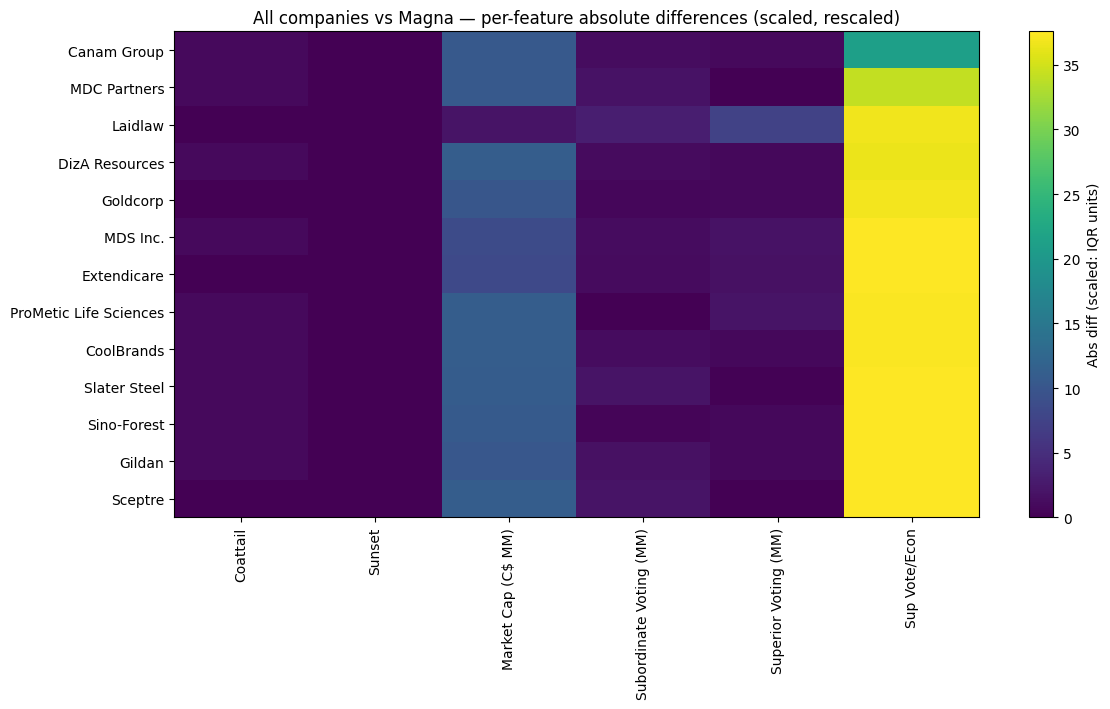

In [990]:
# Order ALL companies by L2 distance to Magna (you already have neighbor_rank)
order_idx = list(neighbor_rank.index)

# (Optional) drop Magna's own row (all zeros) from the display
order_idx = [i for i in order_idx if data.loc[i, "Company"] != "Magna"]

# Choose the data to plot
to_plot = abs_diffs.loc[order_idx, abs_diffs.columns]  # per-feature abs diffs vs Magna

# Color scale: cap at 95th percentile so tiny values show up
vmax = to_plot.stack().quantile(0.95)
vmin = 0.0

# Heatmap
fig, ax = plt.subplots(figsize=(12, 0.4 * len(order_idx) + 2))
im = ax.imshow(to_plot, aspect="auto", vmin=vmin, vmax=vmax, cmap="viridis")

ax.set_yticks(range(len(order_idx)))
ax.set_yticklabels(data.loc[order_idx, "Company"])
ax.set_xticks(range(len(to_plot.columns)))
ax.set_xticklabels(to_plot.columns, rotation=90)

ax.set_title("All companies vs Magna — per-feature absolute differences (scaled, rescaled)")
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Abs diff (scaled: IQR units)")
plt.tight_layout()
plt.show()


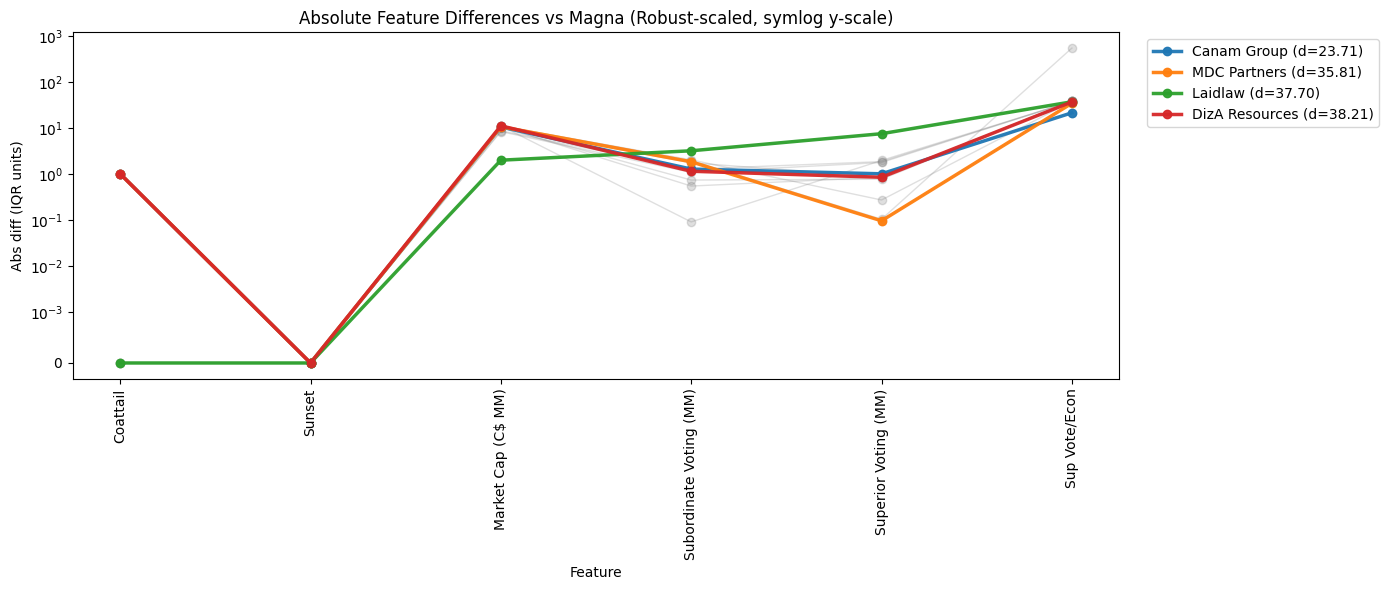

In [991]:
fig, ax = plt.subplots(figsize=(14, 6))
for idx in abs_diffs.index:
    ax.plot(abs_diffs.columns, abs_diffs.loc[idx].values,
            marker="o", linewidth=1, alpha=0.25, color="gray")
for idx in topk_idx:
    ax.plot(abs_diffs.columns, abs_diffs.loc[idx].values,
            marker="o", linewidth=2.5, alpha=0.95,
            label=f"{data.loc[idx, 'Company']} (d={neighbor_rank.loc[idx]:.2f})")

ax.set_yscale("symlog", linthresh=1e-3)   # or "log" if you prefer
ax.set_title("Absolute Feature Differences vs Magna (Robust-scaled, symlog y-scale)")
ax.set_xlabel("Feature")
ax.set_ylabel("Abs diff (IQR units)")
plt.xticks(rotation=90); plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout(); plt.show()


In [992]:
X_scaled["Company"] = data["Company"]

In [993]:
X_scaled

,Coattail,Sunset,Market Cap (C$ MM),Subordinate Voting (MM),Superior Voting (MM),Sup Vote/Econ,Company
0,-1.0,0.0,2.287651,0.138943,0.920635,-0.500000,Extendicare
1,0.0,0.0,0.097892,-0.056751,0.158730,16.192308,Canam Group
2,0.0,0.0,-0.474398,0.000000,0.000000,-0.038462,CoolBrands
3,0.0,0.0,-0.472892,1.301370,1.111111,0.000000,ProMetic Life Sciences
4,0.0,0.0,-0.487952,0.074364,0.000000,0.846154,DizA Resources
5,0.0,0.0,0.000000,-0.614481,-0.936508,3.230769,MDC Partners
6,0.0,0.0,0.338855,-0.520548,0.015873,-0.730769,Gildan
7,0.0,0.0,-0.132530,0.669276,0.000000,-0.500000,Sino-Forest
8,-1.0,0.0,-0.453313,-0.712329,-0.944444,577.730769,Sceptre
9,-1.0,0.0,0.546687,0.479452,-0.079365,0.384615,Goldcorp


In [994]:
MAGNA_SCALED

,Coattail,Sunset,Market Cap (C$ MM),Subordinate Voting (MM),Superior Voting (MM),Sup Vote/Econ
0,-1.0,0.0,10.563253,1.21135,-0.84127,37.384615
